# CS 685 Foundations of Data Science
## Group Project - Movies Recommendation System

### Modules Imports

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image
from IPython.display import display, HTML
import urllib.request
from io import BytesIO
import base64
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

### Load Dataset

In [7]:
# load dataset into a dataframe
tmdb_dataset = pd.read_csv('TMDB_movie_dataset.csv')
df = pd.DataFrame(tmdb_dataset)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Preprocessing

#### Data Information

In [10]:
df.head() # View first few rows

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york c

In [11]:
df.shape

(1130694, 24)

In [12]:
df.original_language.unique()

array(['en', 'ko', 'fr', 'ja', 'it', 'es', 'pl', 'pt', 'hi', 'tr', 'da',
       'de', 'cn', 'id', 'zh', 'sv', 'el', 'ru', 'sr', 'fa', 'th', 'ar',
       'no', 'nb', 'fi', 'te', 'la', 'nl', 'hu', 'he', 'is', 'ro', 'gl',
       'uk', 'eu', 'et', 'bs', 'bn', 'xx', 'sh', 'km', 'cs', 'tn', 'ml',
       'mk', 'ga', 'hy', 'ku', 'ka', 'ta', 'kn', 'tl', 'vi', 'ca', 'dz',
       'sw', 'kk', 'wo', 'sk', 'mi', 'lv', 'bo', 'mn', 'ps', 'lt', 'ur',
       'sl', 'sc', 'af', 'hr', 'iu', 'se', 'ms', 'bm', 'mr', 'bg', 'lo',
       'am', 'cy', 'xh', 'yi', 'qu', 'yo', 'pa', 'sq', 'eo', 'gu', 'zu',
       'st', 'ne', 'ak', 'mt', 'rw', 'as', 'ay', 'ln', 'si', 'mo', 'ff',
       'so', 'ky', 'az', 'ab', 'kl', 'ik', 'jv', 'li', 'sn', 'fo', 'su',
       'my', 'tg', 'ks', 'ht', 'lb', 'sa', 'rm', 'sm', 'tk', 'ha', 'fy',
       'om', 'ny', 'or', 'bi', 'be', 'gd', 'cr', 'uz', 'mg', 'mh', 'gn',
       'co', 'tw', 'nn', 'ia', 'os', 'nv', 'tt', 'ug', 'ig', 'dv', 'ty',
       'sd', 'sg', 'nd', 'kw', 'ie', 'ba', 'oc', 'l

In [13]:
df.status.unique()

array(['Released', 'Planned', 'In Production', 'Post Production',
       'Rumored', 'Canceled'], dtype=object)

In [14]:
# Filtering to show only 'en' movies and which are 'Released' to reduce data and removing movies with no title

df = df.loc[df['original_language'] == 'en'] 
df = df.loc[df['status'] == 'Released'] 
df = df.loc[df['title'].notnull()] 

# Dropping columns which are not required for recommendation - backdrop_path, budget, homepage, imdb_id, poster_path, tagline
df.drop([ 'status', 'budget', 'homepage', 'imdb_id', 'tagline', 'production_companies', 'production_countries','original_title', 'original_language'], axis=1, inplace=True)

In [15]:
df.shape

(596384, 15)

In [16]:
df.info() # Get column names, data types, non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 596384 entries, 0 to 1130692
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                596384 non-null  int64  
 1   title             596384 non-null  object 
 2   vote_average      596384 non-null  float64
 3   vote_count        596384 non-null  int64  
 4   release_date      492007 non-null  object 
 5   revenue           596384 non-null  int64  
 6   runtime           596384 non-null  int64  
 7   adult             596384 non-null  bool   
 8   backdrop_path     150588 non-null  object 
 9   overview          567760 non-null  object 
 10  popularity        596384 non-null  float64
 11  poster_path       396739 non-null  object 
 12  genres            313789 non-null  object 
 13  spoken_languages  273811 non-null  object 
 14  keywords          179072 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usage: 68.8+ MB


In [17]:
df.describe() # Summary statistics for numerical columns

id   vote_average     vote_count       revenue  \
count  5.963840e+05  596384.000000  596384.000000  5.963840e+05   
mean   7.221778e+05       1.865476      30.505724  1.163835e+06   
std    4.027235e+05       3.034280     432.427610  2.377150e+07   
min    5.000000e+00       0.000000       0.000000 -1.200000e+01   
25%    3.781748e+05       0.000000       0.000000  0.000000e+00   
50%    7.238420e+05       0.000000       0.000000  0.000000e+00   
75%    1.083241e+06       4.500000       1.000000  0.000000e+00   
max    1.385987e+06      10.000000   34495.000000  3.000000e+09   

             runtime     popularity  
count  596384.000000  596384.000000  
mean       52.551710       1.339680  
std        66.736794       9.139177  
min       -28.000000       0.000000  
25%         5.000000       0.600000  
50%        35.000000       0.600000  
75%        89.000000       0.845000  
max     14400.000000    2994.357000

In [18]:
# Missing values
df.isnull().sum()

id                       0
title                    0
vote_average             0
vote_count               0
release_date        104377
revenue                  0
runtime                  0
adult                    0
backdrop_path       445796
overview             28624
popularity               0
poster_path         199645
genres              282595
spoken_languages    322573
keywords            417312
dtype: int64

From the above information about dataset, we can say that the below columns are important for getting Recommendations

- title
- vote_average
- vote_count
- release_date
- overview
- genres
- keywords

### Data Cleaning

#### Handling missing values

In [22]:
columns_to_update = ['genres', 'overview', 'keywords']

# Replace NaN with " "
df[columns_to_update] = df[columns_to_update].fillna('')

# Filling default date where it is null
df['release_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

#### Modifying data

In [24]:
# Converting release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Combine fields to new column
df['content'] = df['overview'] + ' ' + df['genres'] + ' ' + df['keywords']

### Demographic Filtering

#### Calculate Top Movies based on the vote count and vote average using IMDB Formula for rating

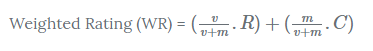

### Content based Recommendation

Using overview, genres and keywords columns to create a new column 'content' and applying Text vectorization using TF-IDF vectorization and using Truncated SVD to reduce dimensions.

Using cosine simiraity to get the top **n** closest movies from a given movie.

In [29]:
def get_unique_genres(df):
    df2 = df.copy()
    # Genres into list
    df2['genres'] = df2['genres'].str.split(", ")
    df2['genres'] = df2['genres'].apply(lambda x: x if isinstance(x, list) else '')
    
    unique_genres = df2['genres'].explode().unique().tolist()
    unique_genres = [genre for genre in unique_genres if genre != '']
    return unique_genres

In [30]:
unique_genres = get_unique_genres(df)
unique_genres

['Action',
 'Science Fiction',
 'Adventure',
 'Drama',
 'Crime',
 'Thriller',
 'Fantasy',
 'Comedy',
 'Romance',
 'Western',
 'Mystery',
 'War',
 'Animation',
 'Family',
 'Horror',
 'Music',
 'History',
 'TV Movie',
 'Documentary']

### Recommendation System Model

In [32]:
class MovieRecommender:
    def __init__(self, df):
        self.df = df
        self.consine_similarity = self.cbr()

    def get_min_votes(self):
        return self.df['vote_count'].quantile(0.9)

    def get_mean(self):
        return self.df['vote_average'].mean()

    def get_p_max(self):
        return self.df['popularity'].max()
        
    # Calculating weighted rating of the movies based on Vote count and Vote average and Popularity
    def weighted_rating(self, x):
        C = self.get_mean()
        m = self.get_min_votes()
        v = x['vote_count']
        R = x['vote_average']
        P = x['popularity'] # adding to increase avg rating
        P_max = self.get_p_max()
        return (v/(v+m) * R) + (m/(m+v) * C) + 0.1 * (P / P_max)
        
    # Calculating Cosine Similarity Score
    def cbr(self):
        # Filtering Intrested Genres
        # recommended_movies = movies[movies['genres'].apply(lambda x: any(genre in x for genre in genres))]
    
        # Filtering top 10000 movies
        recommended_movies = self.df.head(10000)
        
        # Apply TF-IDF vectorizer
        tfidf = TfidfVectorizer(stop_words='english', max_features=5000, min_df=2)
        tfidf_matrix = tfidf.fit_transform(recommended_movies['content'])
    
        # Apply SVD to the TF-IDF matrix
        svd = TruncatedSVD(n_components=100, random_state=42)  # Choose number of components based on experimentation
        svd_matrix = svd.fit_transform(tfidf_matrix)
    
        # Normalize SVD matrix
        normalized_svd_matrix = normalize(svd_matrix)
    
        # Return consine similarity score
        cosine_sim = cosine_similarity(normalized_svd_matrix, normalized_svd_matrix)
    
        return cosine_sim
    
    # Display Results
    def show_results(self, results):
        html_content = '<div style="display: flex; flex-wrap: wrap; gap: 20px;">'
    
        for index, result in results.iterrows():
            title = result.title
            vote_average = result.vote_average
            poster_path = result.poster_path
            genres = result.genres
            rating = round(vote_average) / 2  # Convert to 5-star scale
    
            # Load and resize the image
            url = f"https://image.tmdb.org/t/p/original{poster_path}"
            with urllib.request.urlopen(url) as response:
                img = Image.open(BytesIO(response.read()))
                img_resized = img.resize((200, 250))
    
            # Save image to a temporary BytesIO object to embed it in HTML
            img_io = BytesIO()
            img_resized.save(img_io, format="PNG")
            img_io.seek(0)
            img_data = img_io.getvalue()
            img_base64 = base64.b64encode(img_io.getvalue()).decode("utf-8")
    
            # Add image and text to HTML content
            html_content += f'''
                <div style="text-align: center; width: 200px;">
                    <img src="data:image/png;base64,{img_base64}" width="200" height="250">
                    <h4>{title}</h4>
                    <p><span style="font-weight: bold;">Rating:</span> {rating} / 5</p>
                    <p><span style="font-weight: bold;">Genres:</span> {genres}</p>
                </div>
            '''
    
        html_content += '</div>'
        display(HTML(html_content))

    # Top 10 Movies
    def get_top_movies(self, num=10):
        vote_avg_thresold = 8.0
        vote_count_thresold = 5000
        qualifying_movies = self.df.copy().loc[(self.df['vote_average'] > vote_avg_thresold) 
                                                & (self.df['vote_count'] > vote_count_thresold)].head(1000)
        qualifying_movies['score'] = qualifying_movies.apply(self.weighted_rating, axis=1) # new column to show weighted rating

        # Sort movies based on score calculated above
        qualifying_movies = qualifying_movies.sort_values('score', ascending=False)
    
        # Showing the top movies
        top_movies = qualifying_movies.head(num)
        return top_movies
        
    # Current Top Movies
    def get_current_top_movies(self, num=10):
        past_year = datetime.now().year - 1
        min_votes = self.get_min_votes()
        qualifying_movies = self.df.copy().loc[(self.df['vote_count'] >= min_votes) & (self.df['release_date'].dt.year >= past_year)]
        qualifying_movies['score'] = qualifying_movies.apply(self.weighted_rating, axis=1) # new column to show weighted rating

        # Sort movies based on score calculated above
        qualifying_movies = qualifying_movies.sort_values('score', ascending=False)
    
        # Showing the top movies
        top_movies = qualifying_movies.head(num)
        return top_movies

    # Trending Movies
    def get_trending_movies(self, num=10):
        past_year = datetime.now().year - 1
        trending = self.df.copy().loc[(self.df['release_date'].dt.year >= past_year)] # getting movies from past one year
        trending = trending.sort_values('popularity', ascending=False)
        trending_movies = trending.head(num)

        # Showing the top trending movies
        return trending_movies

    # Similar 10 Movies for a selected movie
    def get_recommendations(self, search_title, num=10):
        cosine_sim = self.consine_similarity
        idx = self.df.index[df['title'] == search_title].tolist()[0]
    
        # Get the pairwise similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Sort movies based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get the indices of the top similar movies
        movie_indices = [i[0] for i in sim_scores[1:(num+1)]]
        
        # Return the top most similar movies
        return self.df[['title', 'vote_average', 'genres', 'poster_path']].iloc[movie_indices]

    def evaluate(self, test_df, num=10):
        # threshold
        relevant_threshold = 7.0  
        recommended_movies = self.get_top_movies(num)

        y_true = (test_df['vote_average'] > relevant_threshold).astype(int)
        y_pred = [1 if movie in recommended_movies['title'].values else 0 for movie in test_df['title']]
        
        # Compute precision, recall, and F1
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
    
        return precision, recall, f1

In [33]:
recommender = MovieRecommender(df)

### Get Current Top 10 Movies


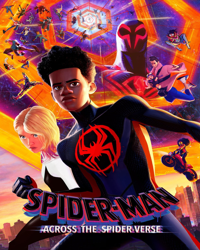
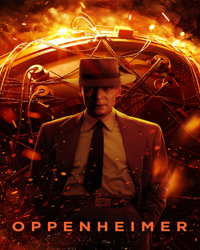
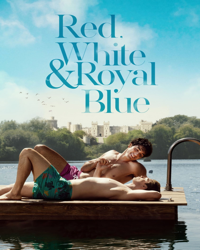
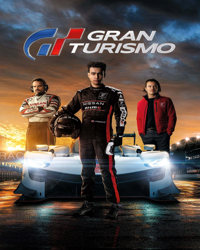
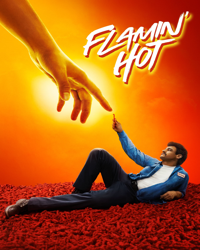
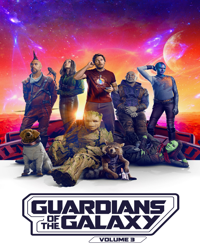
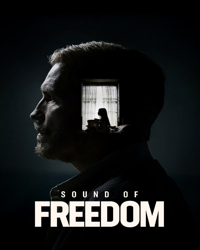
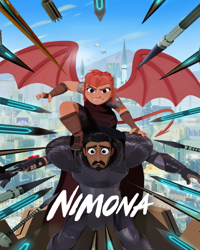
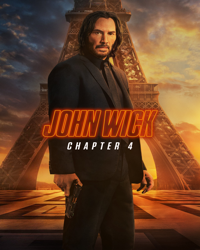
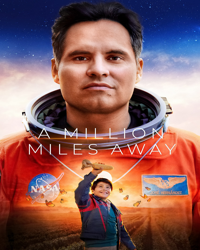

In [35]:
current_top_movies = recommender.get_current_top_movies()
recommender.show_results(current_top_movies)

### Get all time Top 10 Movies


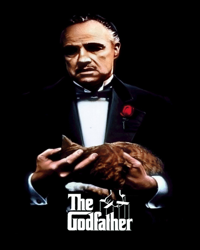
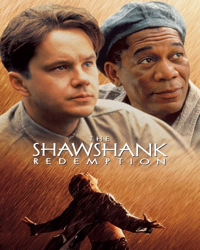
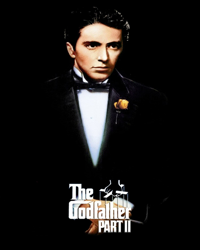
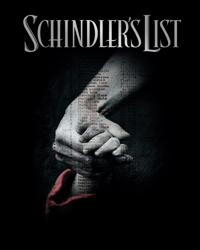
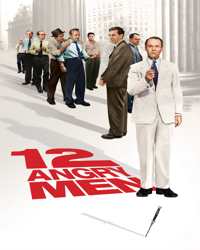
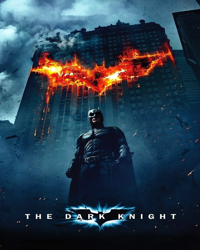
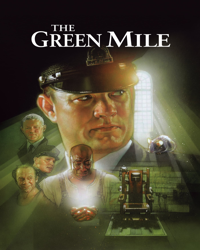
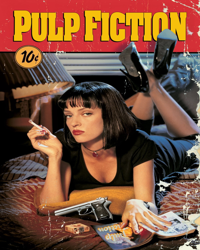
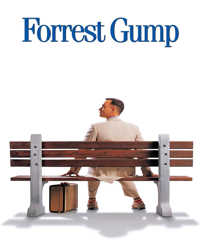
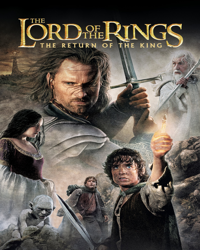

In [37]:
top_movies = recommender.get_top_movies(10)
recommender.show_results(top_movies)

### Get Trending 10 Movies


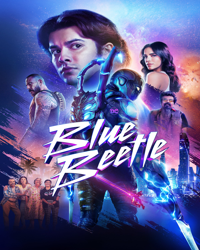
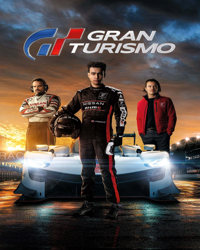
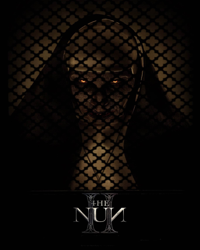
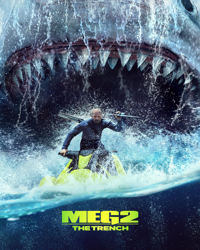
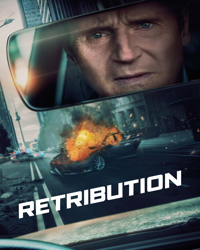
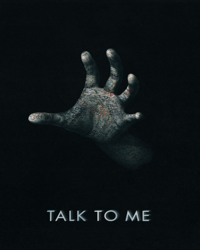
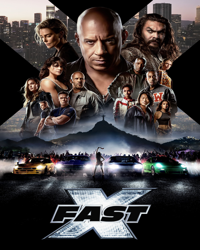
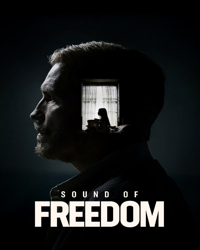
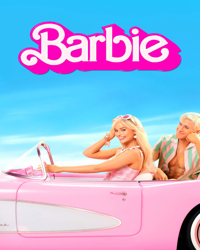
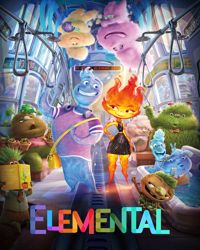

In [39]:
trending_movies = recommender.get_trending_movies()
recommender.show_results(trending_movies)

### Get 10 Recommendations


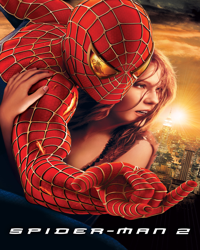
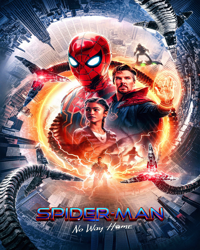
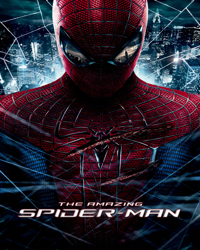
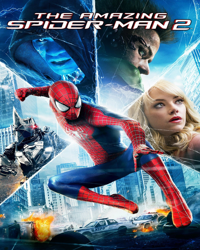
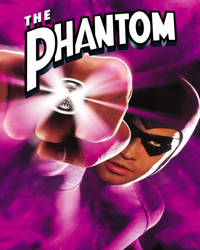
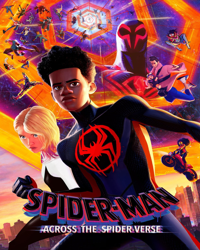
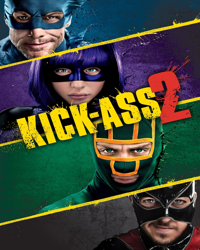
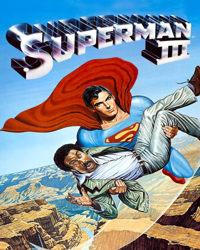
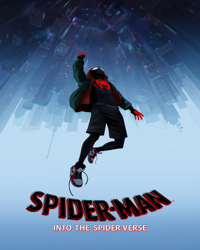
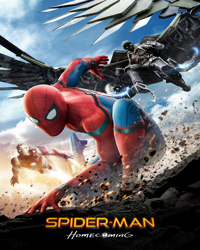

In [41]:
recommendations = recommender.get_recommendations('Spider-Man')
recommender.show_results(recommendations)


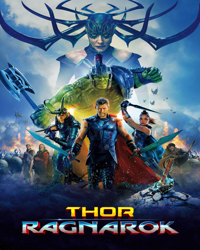
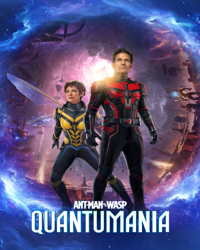
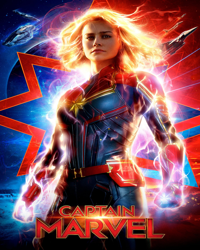
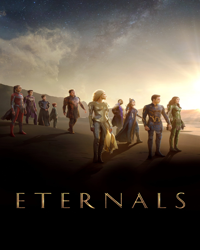
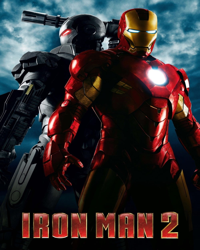
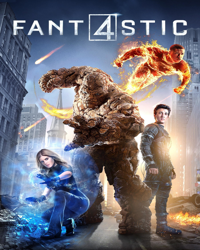
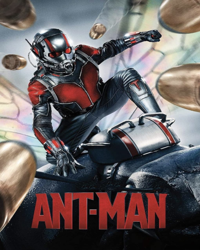
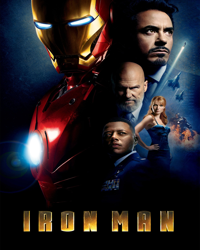
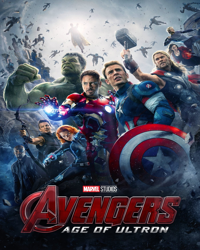
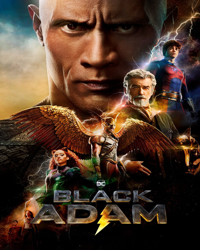

In [42]:
recommendations = recommender.get_recommendations('The Avengers')
recommender.show_results(recommendations)

### Model Evaluation

- Precision
- Recall
- F1-Score

In [44]:
# List of all time top 10 movies of IMDB
top_10_movies_imdb = ['The Shawshank Redemption',
                      'The Godfather',
                      'The Dark Knight',
                      'The Godfather Part II',
                      '12 Angry Men',
                      'The Lord of the Rings: The Return of the King',
                      "Schindler's List",
                      'Pulp Fiction',
                      'The Lord of the Rings: The Fellowship of the Ring',
                      'The Good, the Bad and the Ugly']

test_df = df.copy().loc[df['title'].isin(top_10_movies_imdb)]

In [45]:
precision, recall, f1 = recommender.evaluate(test_df, num=len(top_10_movies_imdb))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.90
Recall: 0.82
F1-Score: 0.86


### References

- [TMDB Dataset](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies)
- [Movie Recommendation System](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system#Credits,-Genres-and-Keywords-Based-Recommender)
- [SVD for Recommender System](https://machinelearningmastery.com/using-singular-value-decomposition-to-build-a-recommender-system/)
- [IMDB Top Movies Chart](https://www.imdb.com/chart/top/)